In [1]:
from RLTrain import Opt
import os
import time
#print(Opt())
import pandas as pd
from RadarGraph import *
plt.rcParams["font.family"] = "Times New Roman"
import sys
sys.path.append('../')

from visualization_helper import *

In [43]:
def plotabt(all_act,actions,colors,names,title_ext="",title=None,ylim=(-0.15,1.15)):
    """Plotting Function for actions vs time
    Inputs:
        all_act (list<np.array>) -- shape is [number of models, number of timesteps, number of actions]
        actions (list<str>) -- list of the name of each action
        colors (list<str>) -- list of colors (should be at least as long as the number of models)
        names (list<str>) -- the names of each model
        title_ext (str) -- addition you want to add to the end of the graph title
    
    """
    fig, axs = plt.subplots(figsize=(9, 5), nrows=len(actions), ncols=len(all_act))
    fig.subplots_adjust(wspace=0.0, hspace=0.0, top=0.85, bottom=0.05)
    #i indexes the each action 
    for i,ax0 in enumerate(axs):
        #j indexes each model
        for j,act in enumerate(all_act):
            #Model name
            axs[0][j].set_title(names[j])
            ax=ax0[j]
            ax.plot(act[:,i],".-",color=colors[j],ms=3,alpha=0.8)
            ax.set_ylim(*ylim)
            if j!=0:
                ax.set_yticks([])
        #Action name name
        ax.text(act.shape[0],ylim[1]*0.5,actions[i],horizontalalignment="right",verticalalignment="top"
                ,bbox=dict(boxstyle="square",facecolor="w",edgecolor="k",alpha=0.8))
    if title is None:
        axs[0][(int(len(names)-0.5)//2)-1].text(2,2,"Average Value of Each Action vs Step %s"%title_ext)
    else:
        axs[0][(int(len(names)-0.5)//2)-1].text(2,2,title)
    #axs[0,-1].legend(names,loc=(0.8, .0))
    axs[-1,0].set_xlabel("Step")
    
    
def mean_stdv_step_n(data,interp_steps=1,steps=20):
    alt_data=data.reshape([data.shape[0],data.shape[1]//interp_steps,interp_steps])
    alt_data=alt_data.transpose(0,2,1)
    alt_data=alt_data.reshape([data.shape[0]*interp_steps,data.shape[1]//interp_steps])
    mean=alt_data.mean(axis=0)
    stdv=(alt_data.var(axis=0))**0.5
    steps=np.arange(mean.shape[0])*steps*interp_steps
    N=alt_data.shape[0]
    return mean,stdv,steps,N

# Wurtz React

In [60]:
parent_dir = "MODELS\\GenWurtzReact-v1"

folders = load_rollouts(parent_dir,obj=None,last=False)
gheuristic = pd.read_pickle("MODELS\\GenWurtzReact-v1\\Heuristic/rollout")

## Returns during Training

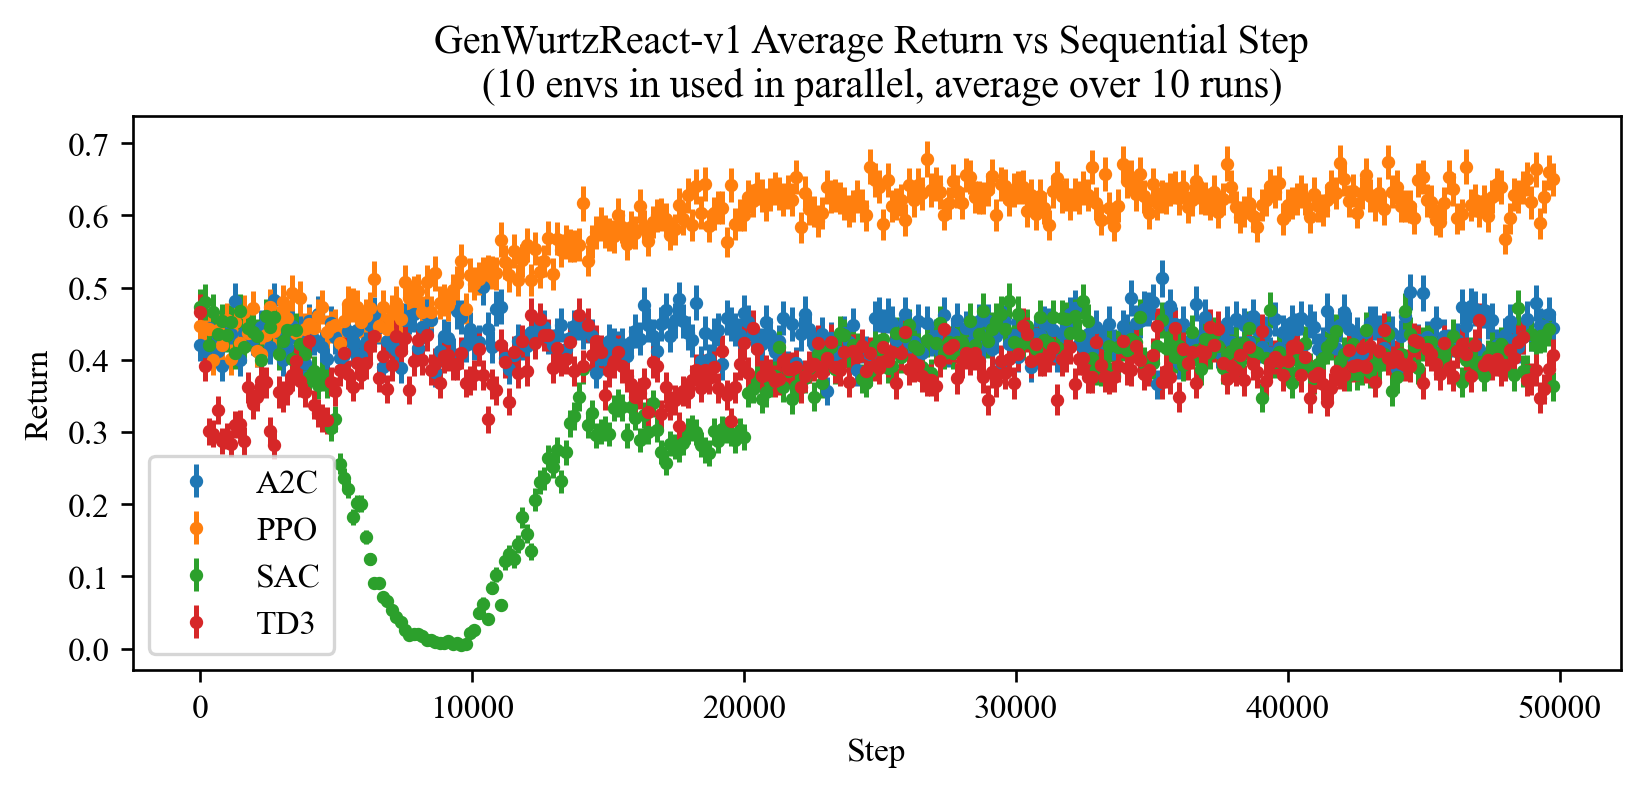

In [59]:
fig = plt.figure(1,figsize=(8,3), dpi=240, facecolor='w', edgecolor='k')

for algo in folders:
    subf = parent_dir+"\\"+algo
    returns,counts=merge_varying_graphs(subf,steps=20,separate_runs=False)    
    #Average over the different runs
    mean,stdv,steps,n= mean_stdv_step_n(returns,interp_steps=8)
    plt.errorbar(steps,mean,stdv/n**0.5,fmt=".",label=algo)
    
plt.xlabel("Step")
plt.ylabel("Return")
plt.legend()    
plt.savefig("Legacy/Figures/WurtzReact/GenWurtzReactRuns.pdf",bbox_inches='tight')
plt.title("GenWurtzReact-v1 Average Return vs Sequential Step \n (10 envs in used in parallel, average over 10 runs)")

plt.show()

In [26]:
800*312*8

1996800

In [ ]:
returns

In [9]:
returns,counts=merge_varying_graphs("MODELS\\GenWurtzReact-v1\\PPO",steps=20,separate_runs=False)    

## Returns VS Targets

Text(0.5, 0.8, 'Average Return VS Target Material (Best model trained with 0.5M Steps)')

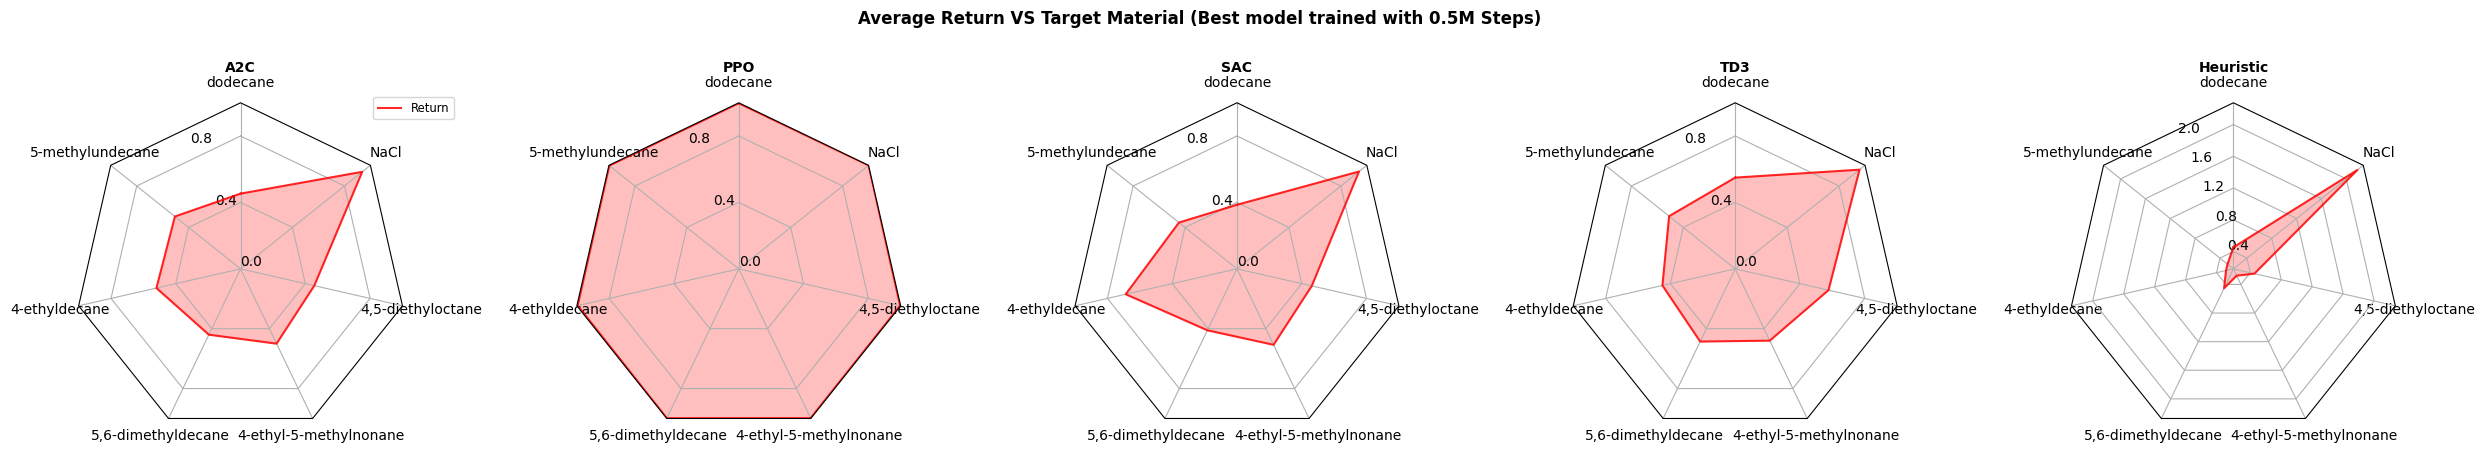

In [18]:
heuristic_rewards=get_conditional_rewards(gheuristic)[1]
radar_info={a:[get_conditional_rewards(folders[a])[1]/heuristic_rewards] for a in folders}

radar_info["Heuristic"] = [heuristic_rewards]

fig,axs = stat_show(radar_info,CWtargs,["Return"],figsize=(30,7))

#plt.savefig("Legacy\\Figures\\WurtzReact\\MeanGenWurtz.pdf",bbox_inches="tight")

#Add in a title
fig.text(0.5, 0.8, "Average Return VS Target Material (Best model trained with 0.5M Steps)",
             horizontalalignment='center', color='black', weight='bold',
             size='large')

## Actions vs Timestep

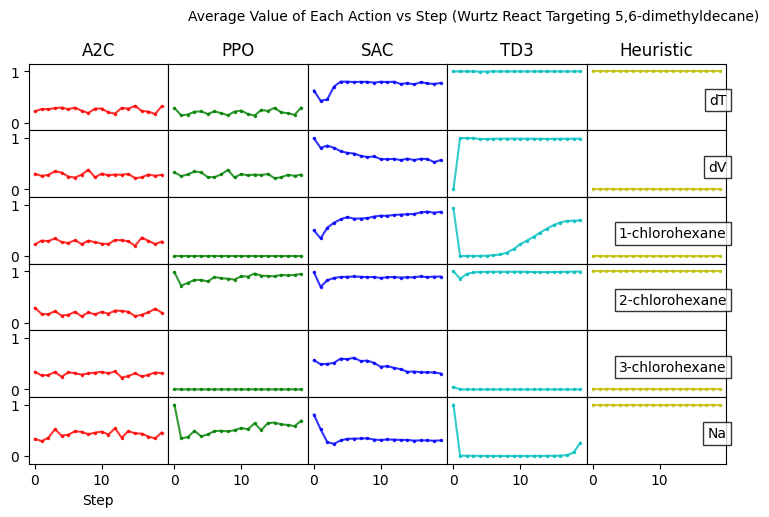

In [6]:
i=3

all_act = ([
actions_by_time(target_subset(folders[name],len(CWtargs),i)) for name in folders]
+[actions_by_time(target_subset(gheuristic,len(CWtargs),i))])
colors = ["r","g","b","c","y","m"]
names=[name for name in folders]+["Heuristic"]

plotabt(all_act,["dT","dV"]+CWchoices,colors,names,title_ext="(Wurtz React Targeting %s)"%CWtargs[i])



# Fict React

In [61]:
parent_dir = "MODELS\\FictReact-v2"
obj = lambda x: get_conditional_rewards(x,FRtargs)[1].mean()

folders = load_rollouts(parent_dir,obj=obj,last=False)
fheuristic = pd.read_pickle("MODELS\\FictReact-v2\\Heuristic\\rollout")

## Returns vs Training

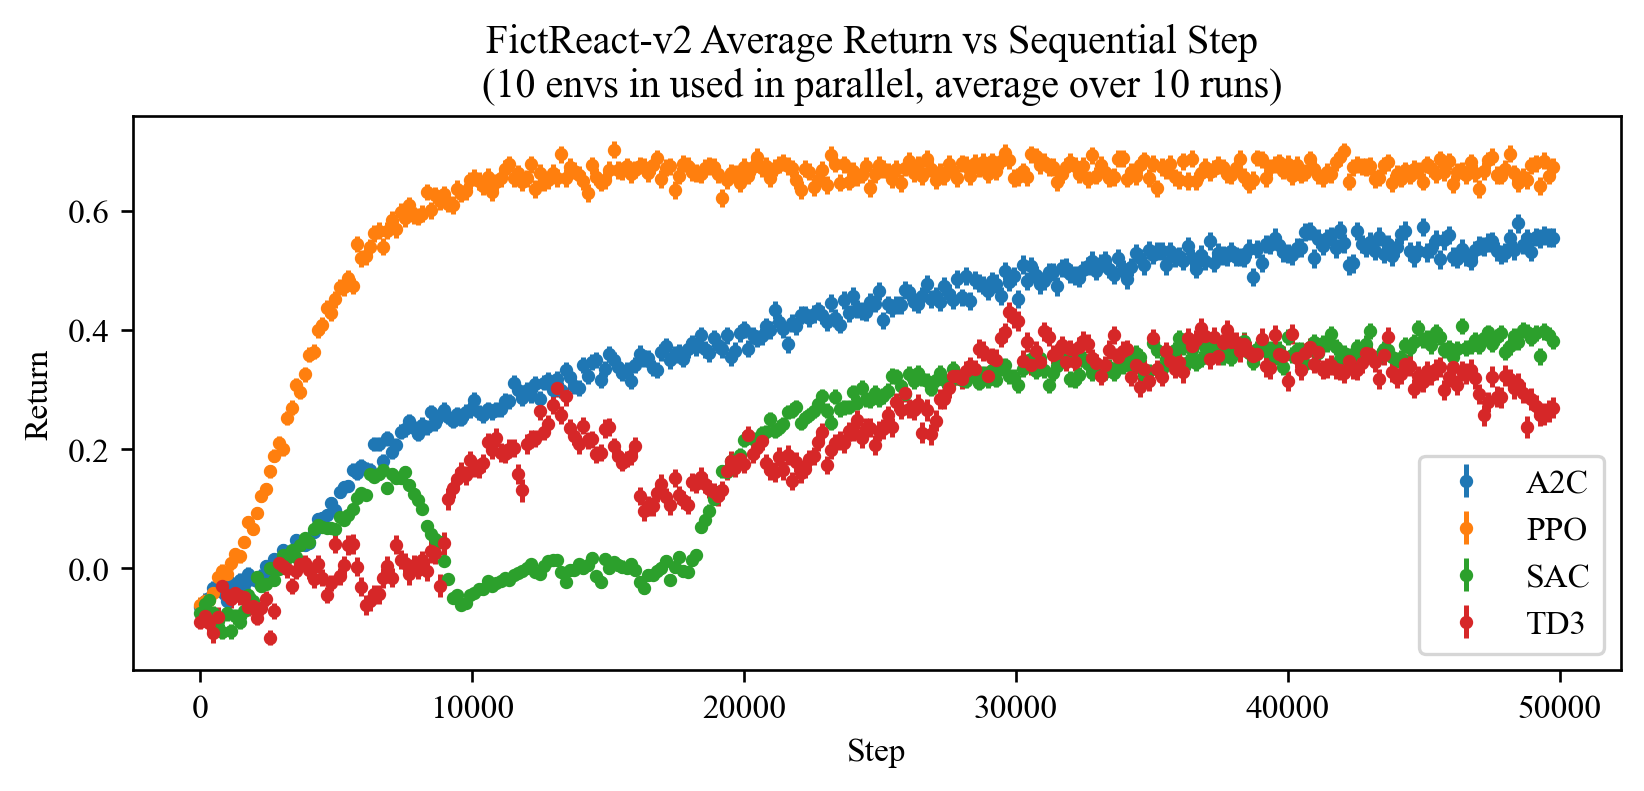

In [62]:
fig = plt.figure(1,figsize=(8,3), dpi=240, facecolor='w', edgecolor='k')

for algo in folders:
    subf = parent_dir+"\\"+algo
    returns,counts=merge_varying_graphs(subf,steps=20,separate_runs=False)    
    #Average over the different runs
    mean,stdv,steps,n= mean_stdv_step_n(returns,interp_steps=8)
    
    plt.errorbar(steps,mean,stdv/n**0.5,fmt=".",label=algo)
    #plt.plot(np.arange(returns.shape[0])*20,returns,".",label=algo,alpha=0.3,mew=0,ms=8)
    
plt.xlabel("Step")
plt.ylabel("Return")
plt.legend()    
plt.savefig("Legacy/Figures/FictReact/FictReactRuns.pdf",bbox_inches='tight')
plt.title("FictReact-v2 Average Return vs Sequential Step \n (10 envs in used in parallel, average over 10 runs)")

plt.show()

## Returns vs Targets

Text(0.5, 0.8, 'Average Return VS Target Material (Best model trained with 0.5M Steps)')

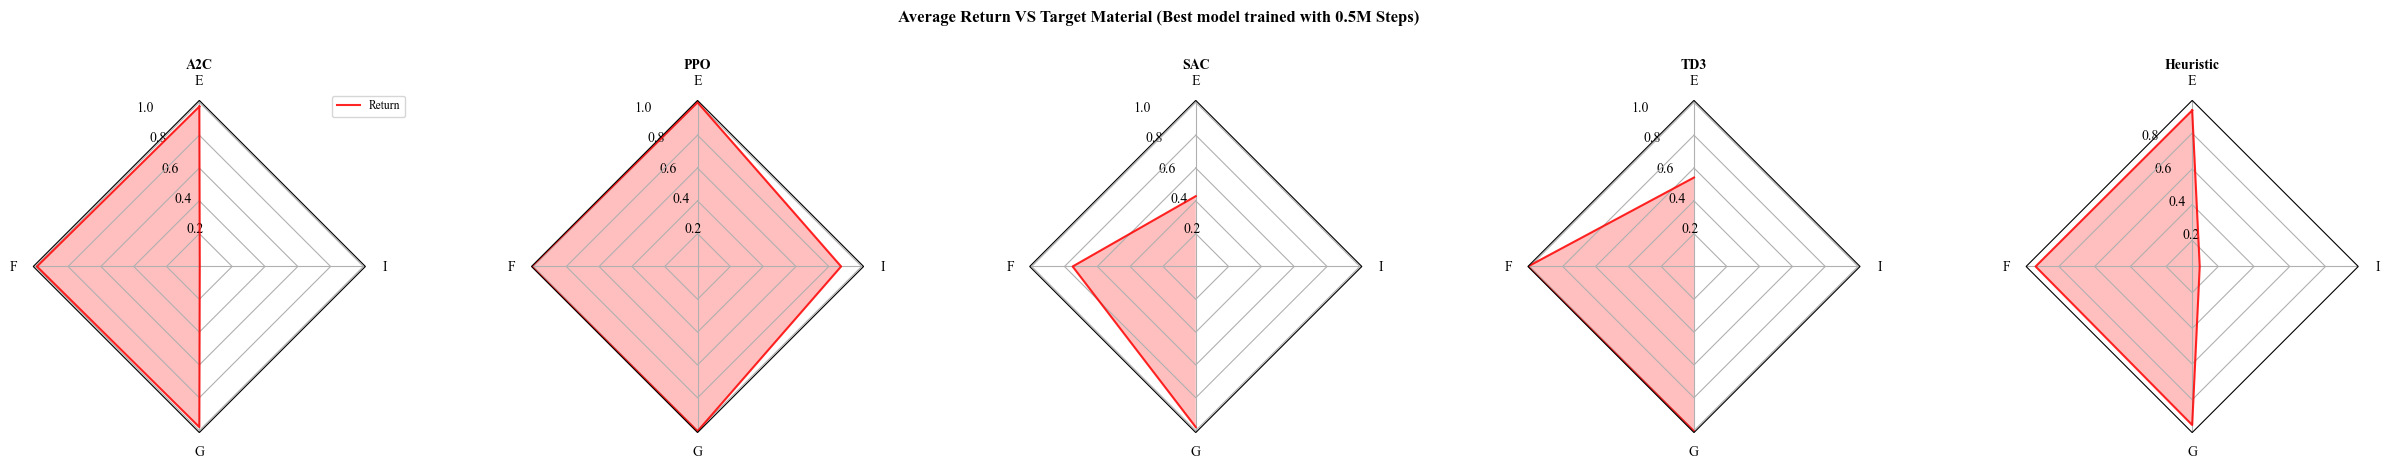

In [63]:
heuristic_rewards=get_conditional_rewards(fheuristic,FRtargs)[1]
radar_info={a:[get_conditional_rewards(folders[a],FRtargs)[1]/heuristic_rewards] for a in folders}

radar_info["Heuristic"] = [heuristic_rewards]

fig,axs = stat_show(radar_info,FRtargs,["Return"],figsize=(30,7),gridlines=[0.2,0.4,0.6,0.8,1.0])
#Add in a title

#plt.savefig("Legacy\\Figures\\FictReact\\MeanFict.pdf",bbox_inches="tight")

fig.text(0.5, 0.8, "Average Return VS Target Material (Best model trained with 0.5M Steps)",
             horizontalalignment='center', color='black', weight='bold',
             size='large')

## Actions Vs Timestep

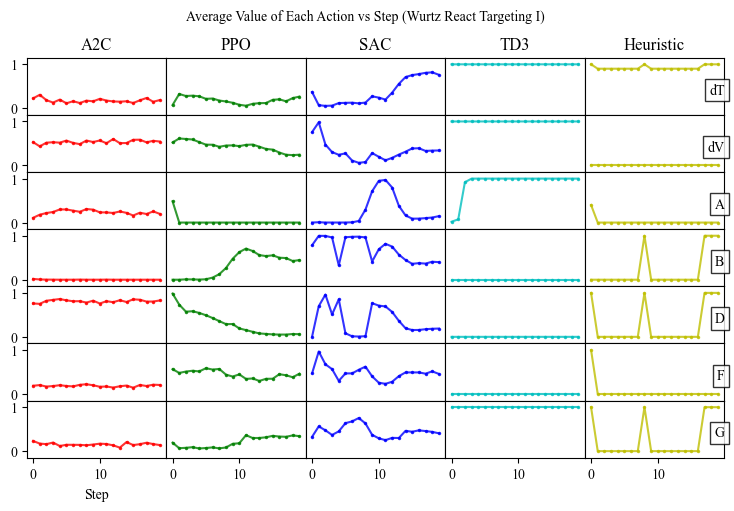

In [64]:
i=3

all_act = ([
actions_by_time(target_subset(folders[name],len(FRtargs),i)) for name in folders]
+[actions_by_time(target_subset(fheuristic,len(FRtargs),i))])
colors = ["r","g","b","c","y","m"]
names=[name for name in folders]+["Heuristic"]

plotabt(all_act,["dT","dV"]+FRchoices,colors,names,title_ext="(Wurtz React Targeting %s)"%FRtargs[i])